In [246]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
# Reading the bike sharing data
bikeSharingDf = pd.read_csv('day.csv')
bikeSharingDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [248]:
# Understanding the number of rows and columns
bikeSharingDf.shape

# Rows -- 730 and Columns -- 16

(730, 16)

In [249]:
# Retriving columns 
bikeSharingDf.columns

# Dependent variable is 'cnt' , rest all are independent/predictive variables

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [250]:
# Missing value check
bikeSharingDf.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [251]:
bikeSharingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [252]:
# There are no columns with missing values

In [253]:
# Dropping variables casual, registered, dteday and instant
bikeSharingDf = bikeSharingDf.drop(columns=['instant', 'dteday', 'casual', 'registered'])
bikeSharingDf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [254]:
# Unique values in all columns
bikeSharingDf.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [255]:
# Categorical variables - season, yr, mnth, holiday, weekday, workingday, weathersit

# Non-Categorical/Continuous variables - temp, atemp, hum, windspeed

# Target variable - cnt

In [256]:
# Analysing statistical data and outliers
bikeSharingDf.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


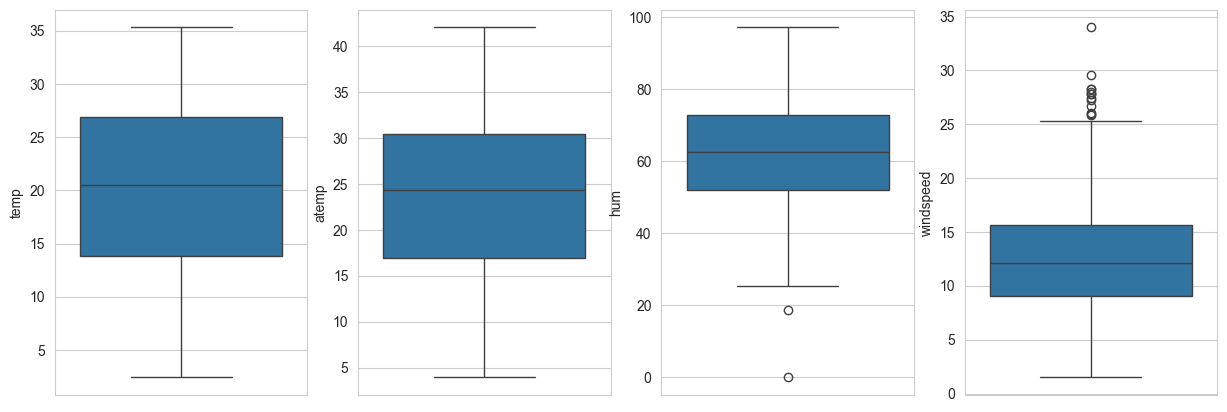

In [257]:
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(15,5))

i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharingDf)
    i+=1

In [258]:
# Data has no outliers 

In [259]:
# Checking categorical variables
# season
print(bikeSharingDf['season'].value_counts())
print('------------------------------------')

# year
print(bikeSharingDf['yr'].value_counts())
print('------------------------------------')

# month
print(bikeSharingDf['mnth'].value_counts())


season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
------------------------------------
yr
0    365
1    365
Name: count, dtype: int64
------------------------------------
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64


In [260]:
# holiday
print(bikeSharingDf['holiday'].value_counts())
print('------------------------------------')

# weekday
print(bikeSharingDf['weekday'].value_counts())
print('------------------------------------')

# workingday
print(bikeSharingDf['workingday'].value_counts())
print('------------------------------------')

# weathersit
print(bikeSharingDf['weathersit'].value_counts())

holiday
0    709
1     21
Name: count, dtype: int64
------------------------------------
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
------------------------------------
workingday
1    499
0    231
Name: count, dtype: int64
------------------------------------
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


In [261]:
# Mapping of categorical columns

# No need to map 'yr' and 'holiday' variables since it has only 2 values - 0 and 1

# Season - 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
bikeSharingDf['season'] = bikeSharingDf['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Month - 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
bikeSharingDf['mnth'] = bikeSharingDf['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Working day - 1:'Working Day' , 0:'Non-Working Day'
bikeSharingDf['workingday'] = bikeSharingDf['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

# Weekday - 1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'
bikeSharingDf['weekday'] = bikeSharingDf['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Weather Sit - 1: 'Clear/Few clouds', 2: 'Cloudy/Misty', 3: 'Light rain/snow/thunderstorm', 4: 'Heavy rain/snow/thunderstorm'
bikeSharingDf['weathersit'] = bikeSharingDf['weathersit'].map({1: 'Clear/Few clouds', 2: 'Cloudy/Misty', 3: 'Light rain/snow/thunderstorm', 4: 'Heavy rain/snow/thunderstorm'})

In [262]:
bikeSharingDf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Mon,Non-Working Day,Cloudy/Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tues,Non-Working Day,Cloudy/Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wed,Working Day,Clear/Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thurs,Working Day,Clear/Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Fri,Working Day,Clear/Few clouds,9.305237,11.46350,43.6957,12.522300,1600


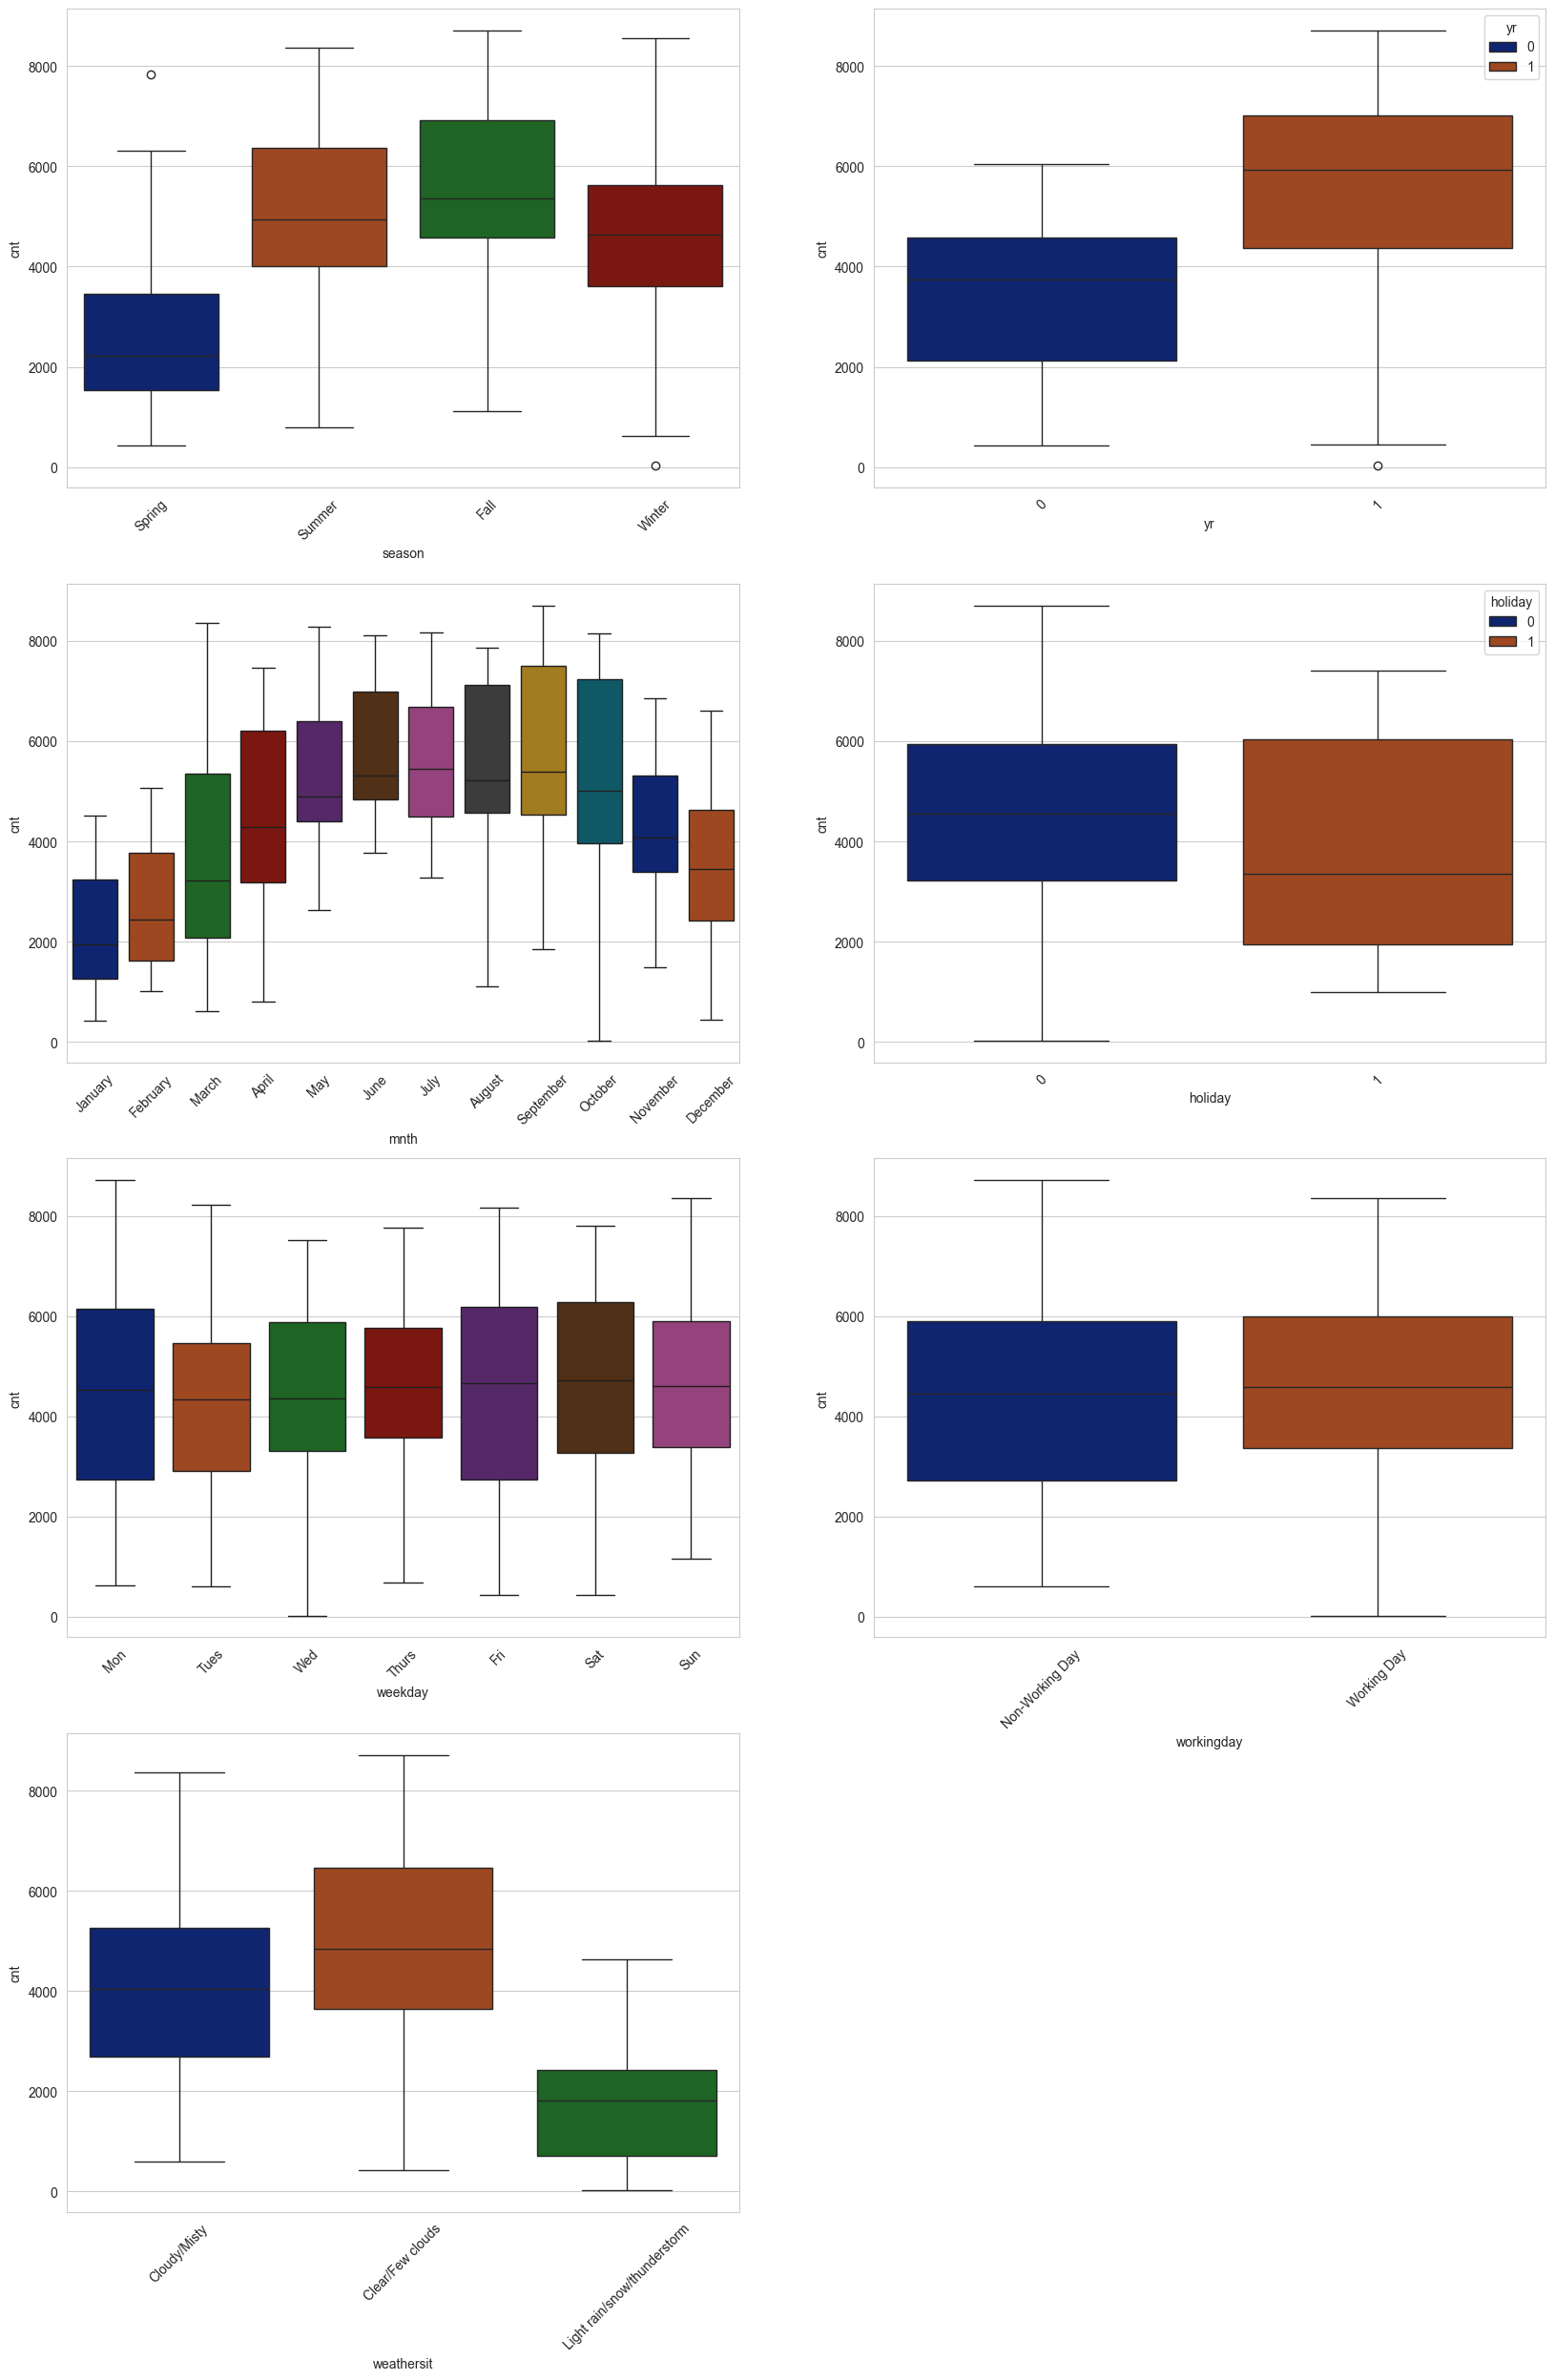

In [263]:
# Plotting Categorical variables against target variable
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 30))
for i in enumerate(vars_cat):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=bikeSharingDf, x=i[1], y='cnt', hue=i[1], palette='dark')
    plt.xticks(rotation=45)
plt.show()

In [264]:
# Conclusions that can be drawn from above plots are:
# Demand for the year 2019 is seen more as compared to 2018.
# Demand is more on working days as expected. 
# Demand is more in the Summer (Months: June, July, August) and Fall season (Months: September, October) when there is less/no rains.
# Demand is more when weather is clear to moderate cloudy and misty . 
# People are not preferring bikes on days when there is rain or snow typically in the months November to March.

# Let us examine further

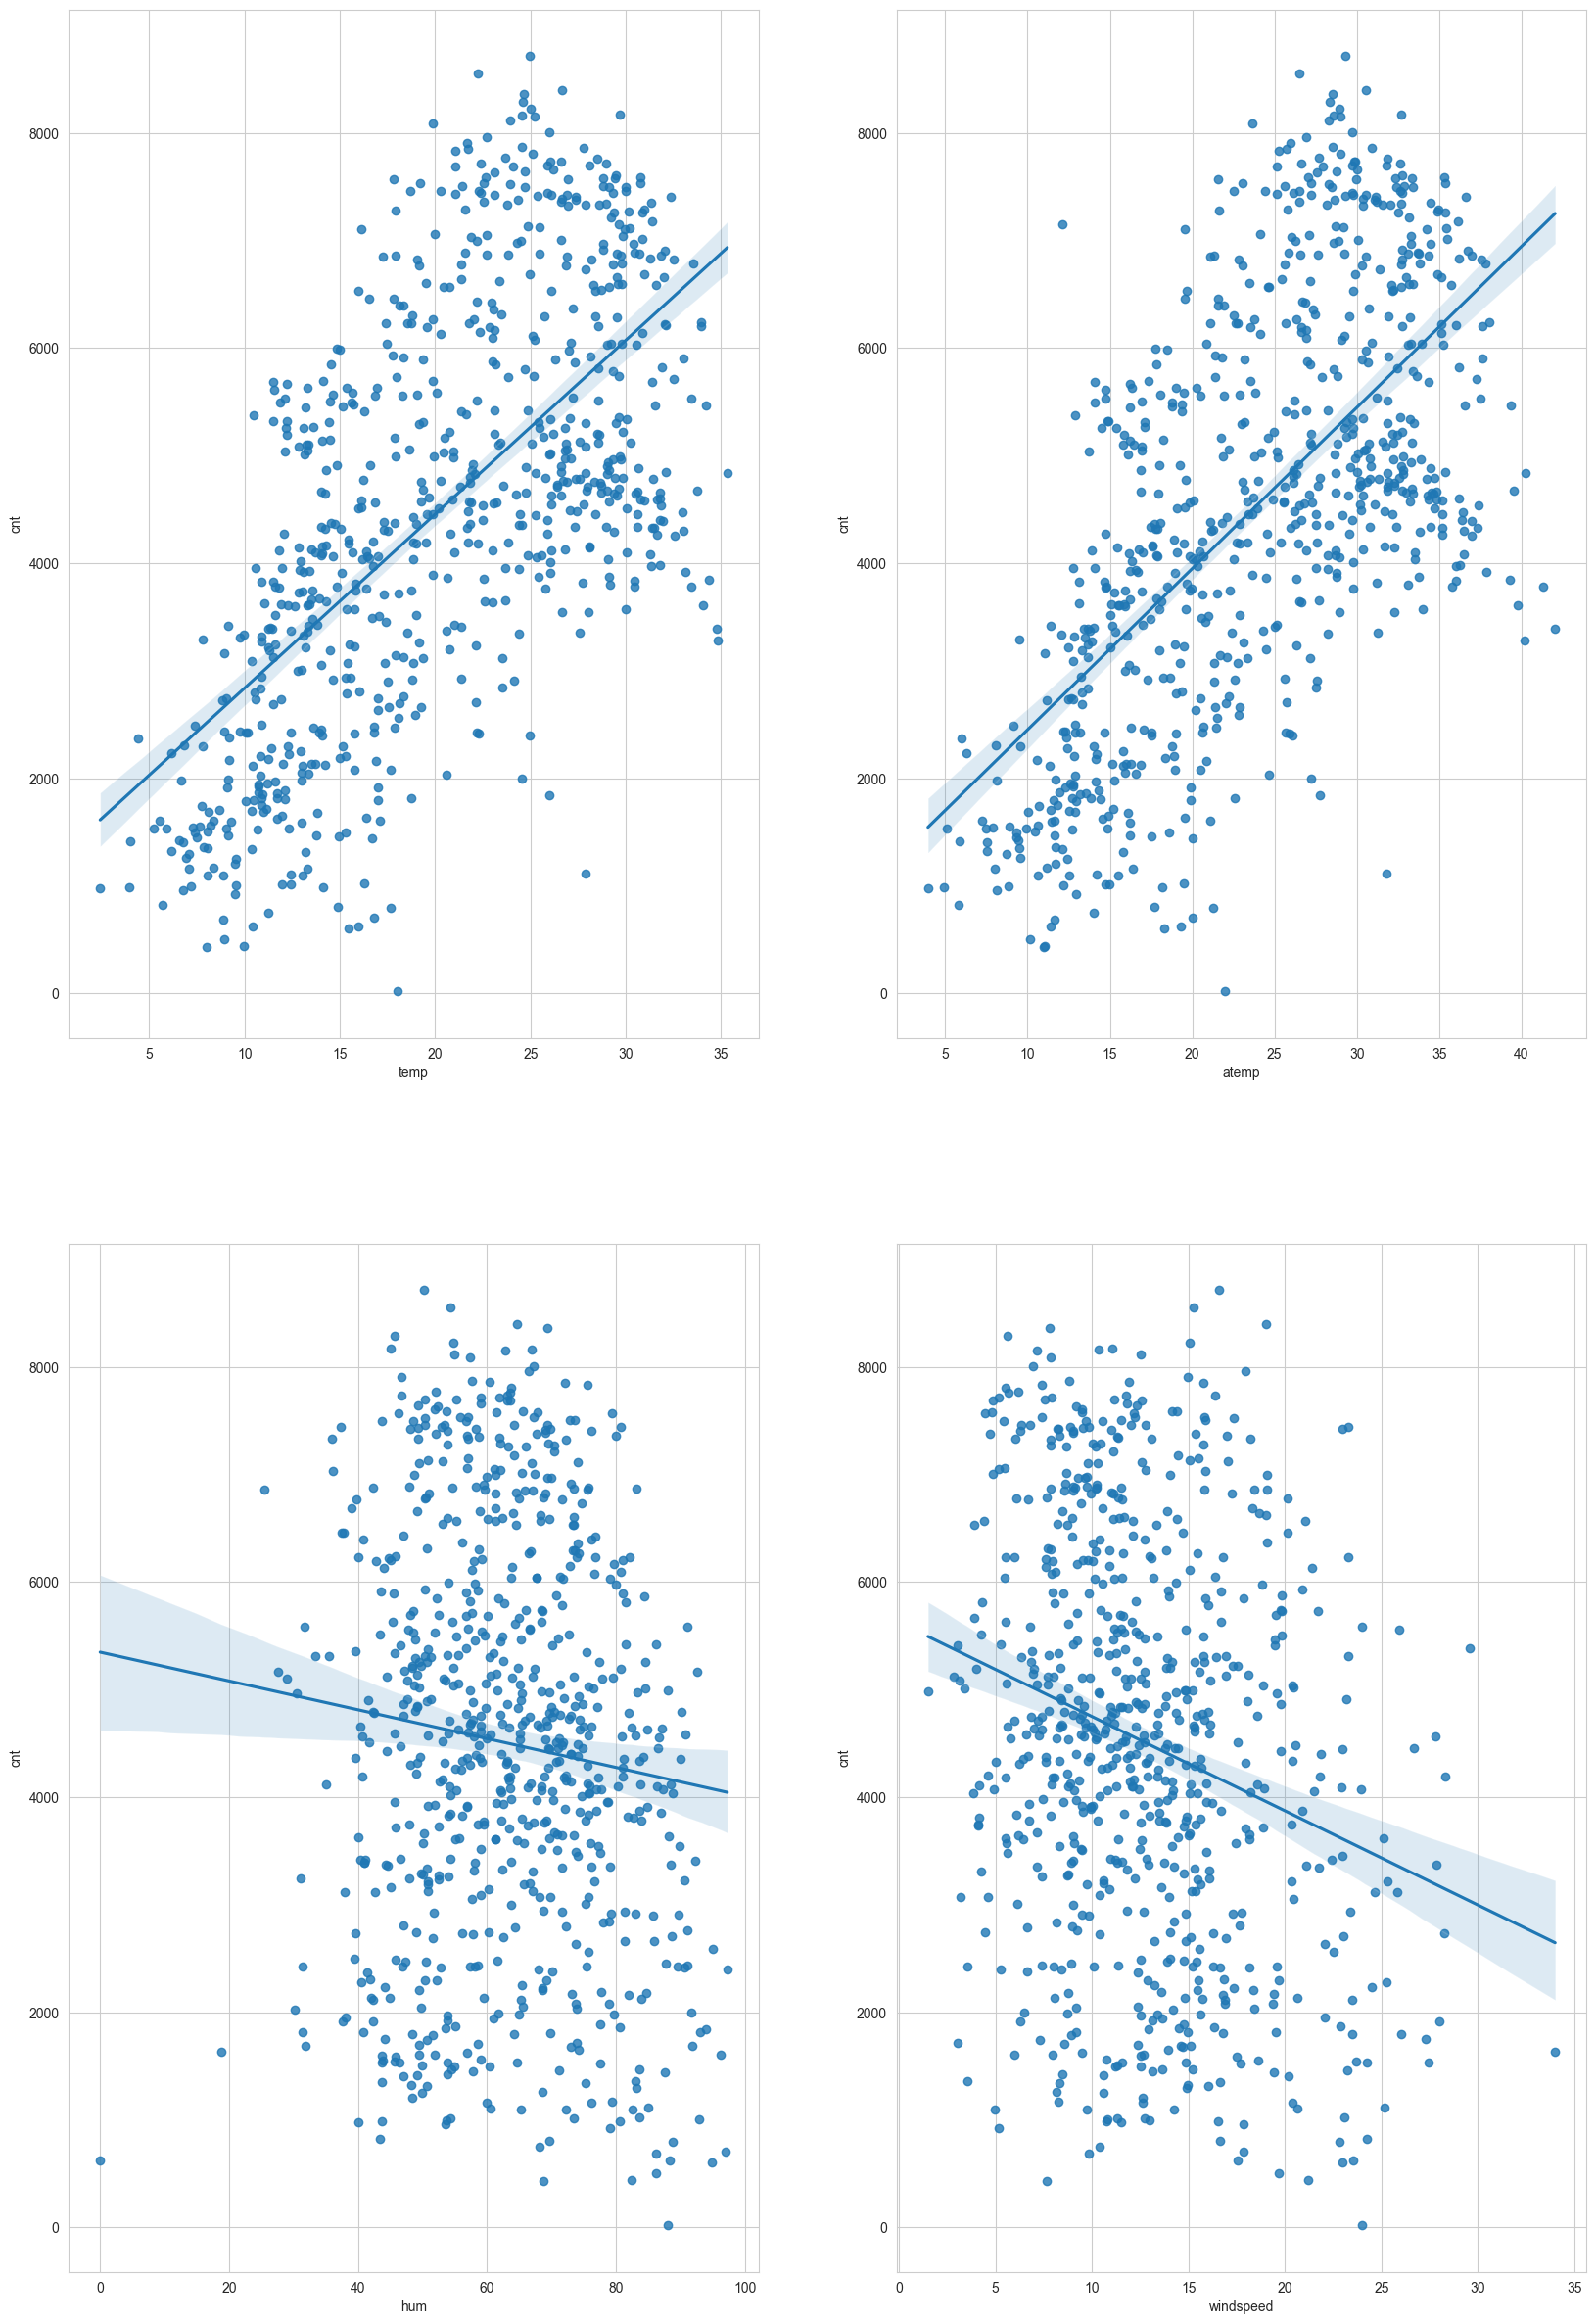

In [265]:
# Plotting numerical variables against target variable
vars_cat = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20, 30))
for i in enumerate(vars_cat):
    plt.subplot(2,2,i[0]+1)
    sns.regplot(data=bikeSharingDf, x=i[1], y='cnt')
plt.show()

In [266]:
# Above plot shows the demand for bikes has linear relation (positive/negative) with all the numerical variables.

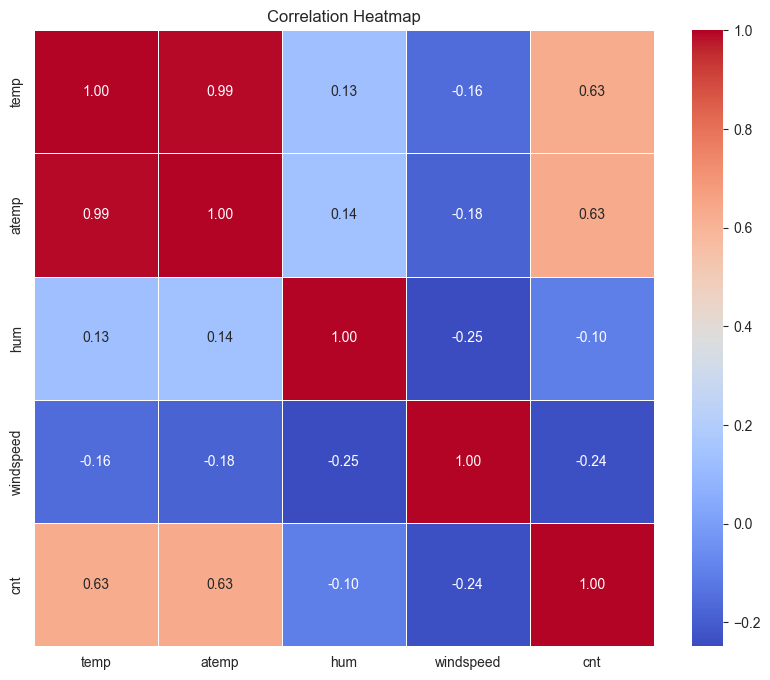

In [267]:
# Plotting heatmap for numerical variables and dependent variable
heatmap_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']
plt.figure(figsize=(10, 8))
sns.heatmap(bikeSharingDf[heatmap_var].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [268]:
# Above plot shows that 'temp' and 'atemp' variable has the highest correlation with the targeted variable.
# Let us examine further

In [269]:
bikeSharingDf.shape

(730, 12)

In [270]:
# ------------------------------------------Linear Regression-------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [271]:
# ------------------Creating dummy variables for the categorical variables with categories>2-------------------
updated_bikSharing_df = pd.get_dummies(data=bikeSharingDf,columns=['season', 'mnth', 'weekday', 'workingday', 'weathersit'],drop_first=True, dtype=int)

updated_bikSharing_df.head()


,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Working Day,weathersit_Cloudy/Misty,weathersit_Light rain/snow/thunderstorm
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [272]:
updated_bikSharing_df.shape

(730, 30)

In [273]:
updated_bikSharing_df.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed',
       'workingday_Working Day', 'weathersit_Cloudy/Misty',
       'weathersit_Light rain/snow/thunderstorm'],
      dtype='object')

In [274]:
# -----------------------------------------Train-Test split--------------------------------------------
y = updated_bikSharing_df.pop('cnt')
X = updated_bikSharing_df


In [275]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [276]:
X.head()


,yr,holiday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Working Day,weathersit_Cloudy/Misty,weathersit_Light rain/snow/thunderstorm
0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [278]:
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


In [279]:
# --------------------------------------------Scaling the data--------------------------------------------
# Scaling only the numerical variables

num_variables = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()

# Training set
X_train[num_variables] = scaler.fit_transform(X_train[num_variables])

# Test set
X_test[num_variables] = scaler.transform(X_test[num_variables])

In [280]:
X_train.head()

,yr,holiday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Working Day,weathersit_Cloudy/Misty,weathersit_Light rain/snow/thunderstorm
653,1,0,0.509887,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
576,1,0,0.815169,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [281]:
# ---------------------------------Using RFE to select top 20 features-------------------------------------
lr = LinearRegression()
selector = RFE(lr, n_features_to_select=20)
selector = selector.fit(X_train, y_train)

In [282]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True])

In [283]:
selected_features=X_train.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_July', 'mnth_May', 'mnth_November',
       'mnth_September', 'weekday_Mon', 'workingday_Working Day',
       'weathersit_Cloudy/Misty', 'weathersit_Light rain/snow/thunderstorm'],
      dtype='object')


In [284]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [285]:
# --------------------------------------------Modeling-------------------------------------------------------
# p-value < 0.05 & VIF <= 5 
# Creating constant
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [286]:
# Model-1
model1 = sm.OLS(y_train, X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.54e-188
Time:                        01:38:38   Log-Likelihood:                -4108.6
No. Observations:                 511   AIC:                             8259.
Df Residuals:                     490   BIC:                             8348.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2613.2267    334.925      7.802      0.000    1955.160    3271.293
yr                                       2018.2878     69.273     29.135      0.000    1882.180    2154.396
holiday                                  -423.3990    234.508     -1.805      0.072    -884.164      37.366
temp                                     3687.0607   1161.753      3.174      0.002    1404.428    5969.694
atemp                                     253.0953   1175.365      0.215      0.830   -2056.282    2562.473
hum                                     -1345.1875    327.392     -4.109      0.000   -1988.453    -701.922
windspeed                               -1618.5687    225.445     -7.179      0.000   -2061.526   -1175.611
season_Spring                            -486.9956    192.325     -2.532      0.012    -864.878    -109.113
season_Summer                             246.9605    149.881      1.648      0.100     -47.529     541.450
season_Winter                             877.1659    157.372      5.574      0.000     567.959    1186.372
mnth_December                            -437.6252    157.230     -2.783      0.006    -746.552    -128.698
mnth_February                            -306.5365    186.041     -1.648      0.100    -672.074      59.001
mnth_January                             -569.2716    184.613     -3.084      0.002    -932.003    -206.541
mnth_July                                -447.2170    156.572     -2.856      0.004    -754.853    -139.581
mnth_May                                  201.5100    150.335      1.340      0.181     -93.871     496.891
mnth_November                            -418.4016    162.590     -2.573      0.010    -737.861     -98.943
mnth_September                            622.1148    144.991      4.291      0.000     337.234     906.996
weekday_Mon                               474.0229    125.556      3.775      0.000     227.328     720.718
workingday_Working Day                    386.8227     99.578      3.885      0.000     191.170     582.476
weathersit_Cloudy/Misty                  -509.1708     89.762     -5.672      0.000    -685.536    -332.805
weathersit_Light rain/snow/thunderstorm -2217.8281    227.562     -9.746      0.000   -2664.946   -1770.710
==============================================================================
Omnibus:                       84.049   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.472
Skew:                          -0.794   Prob(JB):                     2.71e-52
Kurtosis:                       5.938   Cond. No.                         87.0
==============================================================================

Notes:
[1] Stand

In [287]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

                                   Features    VIF
0                                     const  97.45
1                                        yr   1.04
2                                   holiday   1.18
3                                      temp  59.58
4                                     atemp  53.94
5                                       hum   1.97
6                                 windspeed   1.27
7                             season_Spring   5.91
8                             season_Summer   3.63
9                             season_Winter   4.02
10                            mnth_December   1.66
11                            mnth_February   1.87
12                             mnth_January   2.38
13                                mnth_July   1.50
14                                 mnth_May   1.51
15                            mnth_November   1.81
16                           mnth_September   1.35
17                              weekday_Mon   1.79
18                   workingday

In [288]:
# R-squared:0.852 and Adj. R-squared:0.846 has a very minor difference and the value of R-square is good.
# However, variables 'temp' and 'atemp' has a very high VIF and p-value of 'atemp' is also very high
# Hence first lets drop vaiable 'temp' as it has the highest VIF.

In [289]:
# Model-2
X_train_sm = X_train_sm.drop('temp', axis=1)
X_test_sm = X_test_sm.drop('temp', axis=1)

model2 = sm.OLS(y_train, X_train_sm)
res2 = model2.fit()
res2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.78e-187
Time:                        01:38:38   Log-Likelihood:                -4113.8
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     491   BIC:                             8352.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2838.6220    330.319      8.594      0.000    2189.609    3487.635
yr                                       2030.6905     69.798     29.094      0.000    1893.550    2167.831
holiday                                  -385.8005    236.362     -1.632      0.103    -850.207      78.606
atemp                                    3827.2914    339.512     11.273      0.000    3160.215    4494.368
hum                                     -1324.8937    330.340     -4.011      0.000   -1973.948    -675.839
windspeed                               -1488.8754    223.749     -6.654      0.000   -1928.499   -1049.252
season_Spring                            -669.2155    185.242     -3.613      0.000   -1033.181    -305.250
season_Summer                              91.7123    142.977      0.641      0.522    -189.210     372.634
season_Winter                             712.7532    149.967      4.753      0.000     418.097    1007.410
mnth_December                            -497.0316    157.547     -3.155      0.002    -806.581    -187.482
mnth_February                            -346.7661    187.316     -1.851      0.065    -714.806      21.274
mnth_January                             -622.1262    185.551     -3.353      0.001    -986.699    -257.554
mnth_July                                -458.0899    157.974     -2.900      0.004    -768.479    -147.701
mnth_May                                  241.5005    151.184      1.597      0.111     -55.547     538.548
mnth_November                            -466.6690    163.366     -2.857      0.004    -787.651    -145.687
mnth_September                            579.2813    145.689      3.976      0.000     293.030     865.533
weekday_Mon                               477.9367    126.705      3.772      0.000     228.986     726.887
workingday_Working Day                    390.6940    100.486      3.888      0.000     193.258     588.130
weathersit_Cloudy/Misty                  -518.1981     90.542     -5.723      0.000    -696.095    -340.301
weathersit_Light rain/snow/thunderstorm -2200.9715    229.592     -9.586      0.000   -2652.076   -1749.867
==============================================================================
Omnibus:                       83.602   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.431
Skew:                          -0.761   Prob(JB):                     1.26e-56
Kurtosis:                       6.126   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

                                   Features    VIF
0                                     const  93.07
1                                        yr   1.04
2                                   holiday   1.18
3                                     atemp   4.42
4                                       hum   1.97
5                                 windspeed   1.23
6                             season_Spring   5.38
7                             season_Summer   3.24
8                             season_Winter   3.58
9                             mnth_December   1.63
10                            mnth_February   1.86
11                             mnth_January   2.36
12                                mnth_July   1.50
13                                 mnth_May   1.50
14                            mnth_November   1.79
15                           mnth_September   1.34
16                              weekday_Mon   1.79
17                   workingday_Working Day   1.88
18                  weathersit_

In [291]:
# Previous R-square value was 0.852 and current is 0.849 which is a good value.
# Also the R-squared:0.849 and Adj. R-squared:0.843 has a very minor difference
# However, variable 'season_Spring' has a VIP > 5
# Hence lets drop vaiable 'season_Spring'

In [292]:
# Model-3
X_train_sm = X_train_sm.drop('season_Spring', axis=1)
X_test_sm = X_test_sm.drop('season_Spring', axis=1)

model3 = sm.OLS(y_train, X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.65e-186
Time:                        01:38:39   Log-Likelihood:                -4120.5
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     492   BIC:                             8360.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2261.1819    292.590      7.728      0.000    1686.301    2836.062
yr                                       2019.7454     70.581     28.616      0.000    1881.067    2158.423
holiday                                  -403.4422    239.189     -1.687      0.092    -873.399      66.515
atemp                                    4485.4657    289.978     15.468      0.000    3915.718    5055.214
hum                                     -1405.8604    333.591     -4.214      0.000   -2061.299    -750.422
windspeed                               -1567.3118    225.404     -6.953      0.000   -2010.185   -1124.439
season_Summer                             393.7338    117.400      3.354      0.001     163.067     624.401
season_Winter                            1041.8537    120.578      8.640      0.000     804.942    1278.766
mnth_December                            -497.6021    159.465     -3.120      0.002    -810.918    -184.286
mnth_February                            -545.8014    181.210     -3.012      0.003    -901.842    -189.761
mnth_January                             -779.9167    182.533     -4.273      0.000   -1138.556    -421.277
mnth_July                                -345.0386    156.729     -2.202      0.028    -652.979     -37.098
mnth_May                                  178.4506    152.001      1.174      0.241    -120.201     477.102
mnth_November                            -397.8818    164.227     -2.423      0.016    -720.555     -75.208
mnth_September                            720.0331    142.092      5.067      0.000     440.851     999.215
weekday_Mon                               475.4307    128.245      3.707      0.000     223.455     727.406
workingday_Working Day                    393.8549    101.706      3.872      0.000     194.024     593.686
weathersit_Cloudy/Misty                  -494.1314     91.396     -5.407      0.000    -673.705    -314.557
weathersit_Light rain/snow/thunderstorm -2149.9416    231.947     -9.269      0.000   -2605.670   -1694.213
==============================================================================
Omnibus:                       72.154   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.119
Skew:                          -0.682   Prob(JB):                     4.74e-45
Kurtosis:                       5.780   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

                                   Features    VIF
0                                     const  71.28
1                                        yr   1.04
2                                   holiday   1.18
3                                     atemp   3.15
4                                       hum   1.96
5                                 windspeed   1.21
6                             season_Summer   2.13
7                             season_Winter   2.26
8                             mnth_December   1.63
9                             mnth_February   1.70
10                             mnth_January   2.23
11                                mnth_July   1.44
12                                 mnth_May   1.48
13                            mnth_November   1.77
14                           mnth_September   1.24
15                              weekday_Mon   1.79
16                   workingday_Working Day   1.88
17                  weathersit_Cloudy/Misty   1.57
18  weathersit_Light rain/snow/

In [294]:
# Previous R-square value was 0.849 and current is 0.845 which is a good value.
# Also the R-squared:0.845 and Adj. R-squared:0.839 has a very minor difference
# Now, all variables VIF is less than 5 
# However p-value of 'mnth_May' is higher than expected
# Hence lets drop vaiable 'mnth_May'

In [295]:
# Model-4
X_train_sm = X_train_sm.drop('mnth_May', axis=1)
X_test_sm = X_test_sm.drop('mnth_May', axis=1)

model4 = sm.OLS(y_train, X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.35e-186
Time:                        01:38:39   Log-Likelihood:                -4121.2
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     493   BIC:                             8355.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2208.6587    289.261      7.636      0.000    1640.323    2776.994
yr                                       2015.9225     70.533     28.581      0.000    1877.340    2154.505
holiday                                  -408.1832    239.246     -1.706      0.089    -878.251      61.885
atemp                                    4524.8917    288.137     15.704      0.000    3958.763    5091.020
hum                                     -1352.5546    330.613     -4.091      0.000   -2002.139    -702.970
windspeed                               -1575.4791    225.383     -6.990      0.000   -2018.309   -1132.649
season_Summer                             456.3699    104.617      4.362      0.000     250.820     661.919
season_Winter                            1041.8325    120.625      8.637      0.000     804.831    1278.834
mnth_December                            -488.6906    159.345     -3.067      0.002    -801.770    -175.611
mnth_February                            -528.5888    180.685     -2.925      0.004    -883.596    -173.581
mnth_January                             -762.5633    182.003     -4.190      0.000   -1120.160    -404.966
mnth_July                                -352.8981    156.646     -2.253      0.025    -660.674     -45.122
mnth_November                            -388.9793    164.115     -2.370      0.018    -711.430     -66.528
mnth_September                            713.7127    142.045      5.025      0.000     434.625     992.800
weekday_Mon                               472.3305    128.267      3.682      0.000     220.313     724.348
workingday_Working Day                    394.8956    101.741      3.881      0.000     194.996     594.795
weathersit_Cloudy/Misty                  -496.8334     91.402     -5.436      0.000    -676.418    -317.248
weathersit_Light rain/snow/thunderstorm -2166.5798    231.602     -9.355      0.000   -2621.629   -1711.530
==============================================================================
Omnibus:                       70.377   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.991
Skew:                          -0.676   Prob(JB):                     2.04e-42
Kurtosis:                       5.681   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

                                   Features    VIF
0                                     const  69.61
1                                        yr   1.03
2                                   holiday   1.18
3                                     atemp   3.10
4                                       hum   1.93
5                                 windspeed   1.21
6                             season_Summer   1.69
7                             season_Winter   2.26
8                             mnth_December   1.63
9                             mnth_February   1.69
10                             mnth_January   2.21
11                                mnth_July   1.44
12                            mnth_November   1.76
13                           mnth_September   1.24
14                              weekday_Mon   1.79
15                   workingday_Working Day   1.88
16                  weathersit_Cloudy/Misty   1.57
17  weathersit_Light rain/snow/thunderstorm   1.27


In [297]:
# Previous R-square value was 0.845 and current is 0.844 which is a good value.
# Also the R-squared:0.844 and Adj. R-squared:0.839 has a very minor difference
# All variables VIF is less than 5 
# However p-value of 'holiday' is a bit higher than expected
# Hence lets try dropping vaiable 'holiday'

In [298]:
# Model-5
X_train_sm = X_train_sm.drop('holiday', axis=1)
X_test_sm = X_test_sm.drop('holiday', axis=1)

model5 = sm.OLS(y_train, X_train_sm)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.34e-187
Time:                        01:38:39   Log-Likelihood:                -4122.7
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     494   BIC:                             8352.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2152.9874    287.970      7.476      0.000    1587.191    2718.784
yr                                       2017.4494     70.664     28.550      0.000    1878.611    2156.288
atemp                                    4514.7594    288.633     15.642      0.000    3947.660    5081.859
hum                                     -1342.9252    331.204     -4.055      0.000   -1993.667    -692.184
windspeed                               -1580.3407    225.800     -6.999      0.000   -2023.988   -1136.693
season_Summer                             457.0561    104.818      4.360      0.000     251.112     663.000
season_Winter                            1046.6149    120.825      8.662      0.000     809.221    1284.009
mnth_December                            -499.2822    159.532     -3.130      0.002    -812.727    -185.838
mnth_February                            -545.0083    180.777     -3.015      0.003    -900.195    -189.821
mnth_January                             -778.1832    182.124     -4.273      0.000   -1136.016    -420.351
mnth_July                                -344.0749    156.863     -2.193      0.029    -652.276     -35.874
mnth_November                            -422.4213    163.255     -2.587      0.010    -743.181    -101.661
mnth_September                            696.4775    141.959      4.906      0.000     417.560     975.395
weekday_Mon                               532.4285    123.574      4.309      0.000     289.633     775.224
workingday_Working Day                    454.8793     95.658      4.755      0.000     266.933     642.825
weathersit_Cloudy/Misty                  -495.0714     91.573     -5.406      0.000    -674.991    -315.152
weathersit_Light rain/snow/thunderstorm -2163.7137    232.044     -9.325      0.000   -2619.628   -1707.799
==============================================================================
Omnibus:                       76.039   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.007
Skew:                          -0.718   Prob(JB):                     2.05e-47
Kurtosis:                       5.834   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

                                   Features    VIF
0                                     const  68.73
1                                        yr   1.03
2                                     atemp   3.10
3                                       hum   1.93
4                                 windspeed   1.21
5                             season_Summer   1.69
6                             season_Winter   2.26
7                             mnth_December   1.63
8                             mnth_February   1.68
9                              mnth_January   2.21
10                                mnth_July   1.44
11                            mnth_November   1.74
12                           mnth_September   1.23
13                              weekday_Mon   1.65
14                   workingday_Working Day   1.66
15                  weathersit_Cloudy/Misty   1.57
16  weathersit_Light rain/snow/thunderstorm   1.27


In [300]:
# Previous R-square value was 0.844 and current is 0.843 which is a good value.
# Also the R-squared:0.843 and Adj. R-squared:0.838 has a very minor difference
# All variables VIF is less than 5 
# All variables p-value is also less than 0.05

In [301]:
# Since its better to have less number of significant features
# Checking by dropping variable 'mnth_July' to see if it affects R-square and VIF values
# Model-6
X_train_sm = X_train_sm.drop('mnth_July', axis=1)
X_test_sm = X_test_sm.drop('mnth_July', axis=1)

model6 = sm.OLS(y_train, X_train_sm)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.48e-187
Time:                        01:38:39   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     495   BIC:                             8350.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2150.4394    289.074      7.439      0.000    1582.477    2718.402
yr                                       2024.0872     70.870     28.560      0.000    1884.844    2163.331
atemp                                    4302.6465    272.996     15.761      0.000    3766.272    4839.021
hum                                     -1276.0853    331.066     -3.854      0.000   -1926.553    -625.617
windspeed                               -1570.8191    226.626     -6.931      0.000   -2016.087   -1125.551
season_Summer                             524.7786    100.553      5.219      0.000     327.216     722.341
season_Winter                            1086.6679    119.896      9.063      0.000     851.100    1322.236
mnth_December                            -509.4204    160.078     -3.182      0.002    -823.936    -194.905
mnth_February                            -533.2584    181.392     -2.940      0.003    -889.652    -176.865
mnth_January                             -783.9090    182.805     -4.288      0.000   -1143.078    -424.740
mnth_November                            -430.9831    163.836     -2.631      0.009    -752.882    -109.084
mnth_September                            772.9822    138.136      5.596      0.000     501.577    1044.387
weekday_Mon                               536.1374    124.037      4.322      0.000     292.433     779.842
workingday_Working Day                    462.1510     95.967      4.816      0.000     273.597     650.705
weathersit_Cloudy/Misty                  -497.4218     91.918     -5.412      0.000    -678.019    -316.824
weathersit_Light rain/snow/thunderstorm -2195.6245    232.477     -9.444      0.000   -2652.388   -1738.861
==============================================================================
Omnibus:                       82.672   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.294
Skew:                          -0.781   Prob(JB):                     2.19e-51
Kurtosis:                       5.918   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

                                   Features    VIF
0                                     const  68.72
1                                        yr   1.03
2                                     atemp   2.75
3                                       hum   1.91
4                                 windspeed   1.21
5                             season_Summer   1.54
6                             season_Winter   2.21
7                             mnth_December   1.62
8                             mnth_February   1.68
9                              mnth_January   2.21
10                            mnth_November   1.74
11                           mnth_September   1.16
12                              weekday_Mon   1.65
13                   workingday_Working Day   1.66
14                  weathersit_Cloudy/Misty   1.57
15  weathersit_Light rain/snow/thunderstorm   1.27


In [303]:
# Previous R-square value was 0.843 and current is 0.842 which is a good value.
# Also the R-squared:0.842 and Adj. R-squared:0.837 has a very minor difference
# Hence 'mnth_July' could be dropped.

In [304]:
# ---------------------------------------------Model Evaluation----------------------------------------------

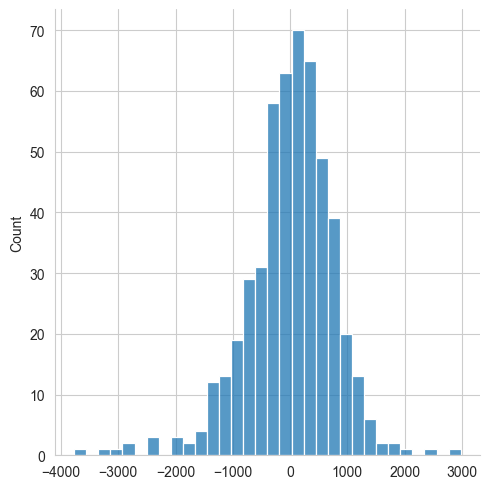

In [305]:
# Residual analysis
y_train_pred = res6.predict(X_train_sm)

res = y_train - y_train_pred
sns.displot(res)

In [306]:
# The errors are normally distributed with mean as 0

In [307]:
# Prediction and evaluation on test set data
y_test_pred = res6.predict(X_test_sm)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training:", round(r2_train,2))
print("Test:", round(r2_test,2))

Training: 0.84
Test: 0.82


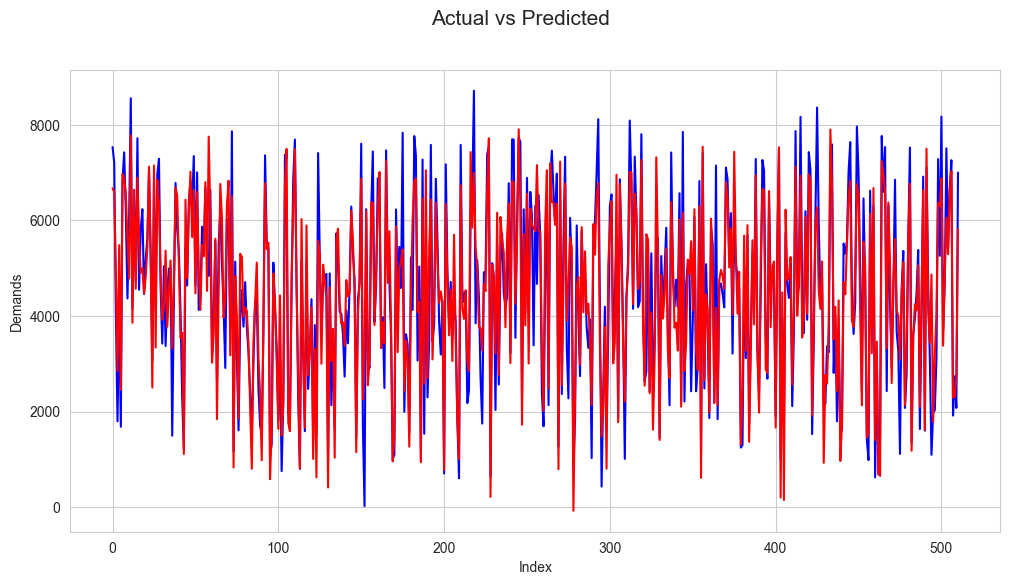

In [308]:
# Plotting Actual vs Predicted
# y-train vs y-train-pred
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(12, 6))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

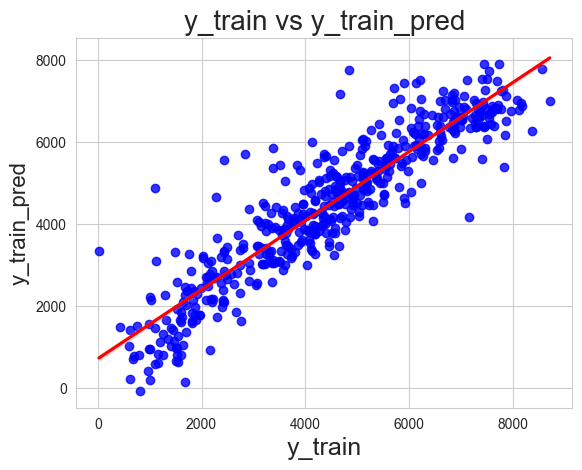

In [309]:
# y-train vs y-train-pred
plt.figure()
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

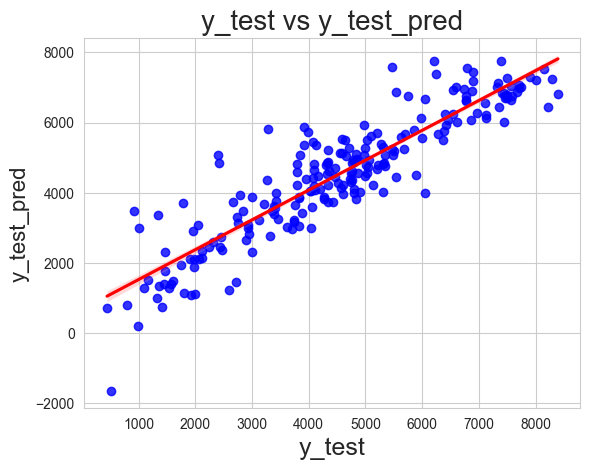

In [310]:
# y-test vs y-test-pred
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

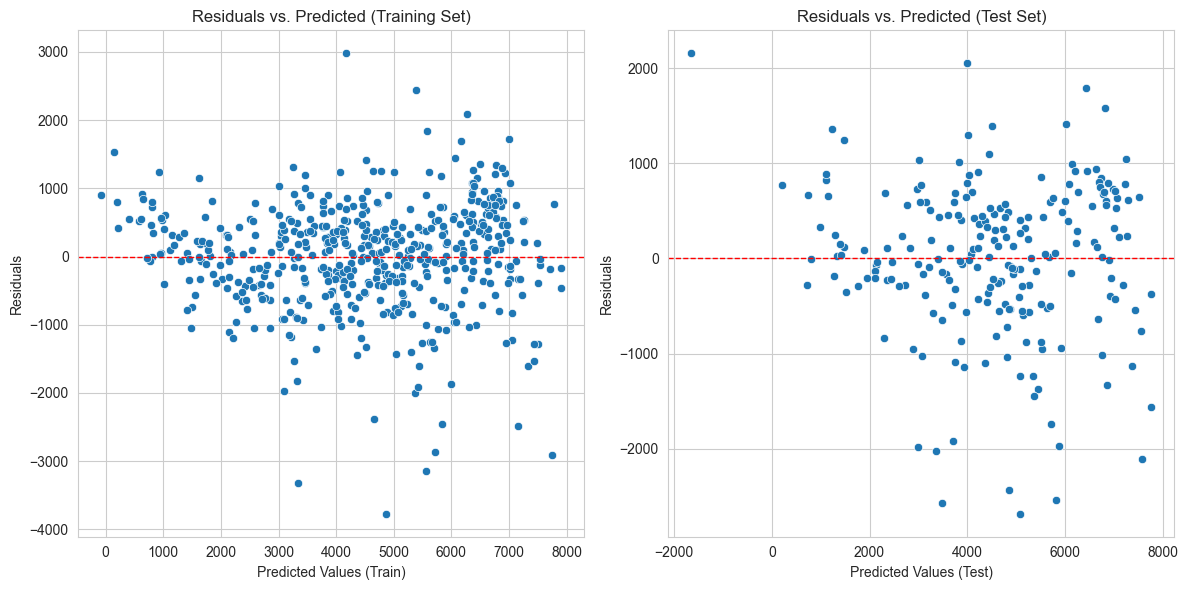

In [311]:
# Plotting of the residuals
# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(12, 6))

# Residual plot for training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=residuals_train)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values (Train)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted (Training Set)')

# Residual plot for test set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=residuals_test)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values (Test)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted (Test Set)')

plt.tight_layout()
plt.show()

In [312]:
# R2 value for predictions on test data (0.82) is quite close to the R2 value of train data(0.84). 
# Also, the errors are normally distributed with mean as 0.
# Also, residuals are randomly scattered around zero without forming any patterns, indicating constant variance.
# Also, this is a good R-squared value, hence it can be concluded that our model is performing good on test data as well.

In [313]:
# Conclusion:

# Annual Trends:
# Each additional year correlates with an increase in the demand for bikes, indicating a strong positive trend over time.

# Humidity and Windspeed: 
# Increases in humidity and windspeed are associated with a decrease in the dependent variable. This suggests that higher humidity and windspeed negatively impact bike usage.

# Weather Conditions: 
# During high thunderstorms, rain, or snow, bike usage decreases significantly. People tend to avoid biking in adverse weather conditions.

# Temperature Effects:
# A higher temperature has a substantial positive effect on bike usage. As temperatures rise, people are more inclined to use bikes, highlighting the importance of favorable weather for increasing bike demand.

# Seasonal Performance: 
# Bike usage tends to increase in September and tends to fall from November to February.
# The business is expected to perform well during the summer and winter months. It is crucial to focus on maintaining bike availability and optimizing services during these high-demand periods.

# Working Days and Mondays: 
# Bike usage is notably higher on working days, especially on Mondays. This indicates a peak in demand at the start of the workweek.